#  SAP bikes store sales analysis
* **Dummy sales data (bikes sales)**
* **Data warehouse cloud content master**

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import dateutil
import seaborn as sns
from copy import deepcopy

import os


# (EDA) Load and explor sales orders data

In [2]:
bikes_sales_data = pd.read_csv('SalesOrders.csv')


In [3]:
#Display first 10 rows
bikes_sales_data.head(10)

,SALESORDERID,CREATEDBY,CREATEDAT,CHANGEDBY,CHANGEDAT,FISCVARIANT,FISCALYEARPERIOD,NOTEID,PARTNERID,SALESORG,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,LIFECYCLESTATUS,BILLINGSTATUS,DELIVERYSTATUS
0,500000000,4,20180111,4,20180116,K4,2018001,NaN,100000022,APJ,USD,13587,11888.625,1698.375,C,C,C
1,500000001,2,20180112,2,20180115,K4,2018001,NaN,100000026,EMEA,USD,12622,11044.250,1577.750,C,C,C
2,500000002,5,20180115,5,20180120,K4,2018001,NaN,100000018,APJ,USD,45655,39948.125,5706.875,C,C,C
3,500000003,3,20180115,3,20180120,K4,2018001,NaN,100000009,EMEA,USD,101786,89062.750,12723.250,C,C,C
4,500000004,8,20180116,8,20180117,K4,2018001,NaN,100000025,EMEA,USD,71684,62723.500,8960.500,C,C,C
5,500000005,8,20180116,8,20180119,K4,2018001,NaN,100000008,EMEA,USD,104213,91186.375,13026.625,C,C,C
6,500000006,3,20180117,3,20180120,K4,2018001,NaN,100000038,EMEA,USD,173987,152238.625,21748.375,C,C,C
7,500000007,4,20180119,4,20180121,K4,2018001,NaN,100000020,APJ,USD,1398,1223.250,174.750,C,C,C
8,500000008,3,20180120,3,20180122,K4,2018001,NaN,100000028,EMEA,USD,127803,111827.625,15975.375,C,C,C
9,500000009,4,20180121,4,20180122,K4,2018001,NaN,100000021,APJ,USD,79101,69213.375,9887.625,C,C,C


**Get Total (rows, cols) using: shape**

In [4]:
# Display total number of (rows, cols) using shape
bikes_sales_data.shape

(334, 17)

# Data Cleaning
Find the null values

In [5]:
# use isnull() to get the null values
null_values = bikes_sales_data.isnull().sum()
null_values


SALESORDERID          0
CREATEDBY             0
CREATEDAT             0
CHANGEDBY             0
CHANGEDAT             0
FISCVARIANT           0
FISCALYEARPERIOD      0
NOTEID              334
PARTNERID             0
SALESORG              0
CURRENCY              0
GROSSAMOUNT           0
NETAMOUNT             0
TAXAMOUNT             0
LIFECYCLESTATUS       0
BILLINGSTATUS         0
DELIVERYSTATUS        0
dtype: int64

In [6]:
# how many total missing values do we have?
total_cells = np.product(bikes_sales_data.shape)
total_missing = null_values.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100

print("Total cells in data set: " + str(total_cells),
      "Total of Null values: " +
      str(total_missing), "percent missing: " +
      str(percent_missing))


Total cells in data set: 5678 Total of Null values: 334 percent missing: 5.88235294117647


* **NOTEID filed is empty with no data which means all valus are null.**
* **Kaggl Advise: waht is null keep it null... it is not important**

In [7]:
#Drop NOTEID column 
bikes_sales_data = bikes_sales_data.drop(['NOTEID'], axis = 1)


In [8]:
# double check if there is any null values after droping NOTEID col
print(bikes_sales_data.isnull().sum())

SALESORDERID        0
CREATEDBY           0
CREATEDAT           0
CHANGEDBY           0
CHANGEDAT           0
FISCVARIANT         0
FISCALYEARPERIOD    0
PARTNERID           0
SALESORG            0
CURRENCY            0
GROSSAMOUNT         0
NETAMOUNT           0
TAXAMOUNT           0
LIFECYCLESTATUS     0
BILLINGSTATUS       0
DELIVERYSTATUS      0
dtype: int64


# Group sales records per sales Orgnization



In [9]:
# declear paython function

def bar_plot(variable):
    """
        input: variable e.g. SALES ORG
        output: bar plot & value count
    """
    # get feature
    var = bikes_sales_data[variable]
    #count numer of categorical variable(value/sample)
    varValue = var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

Create Sales Org Category

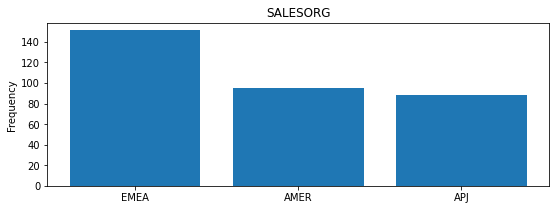

SALESORG: 
 EMEA    151
AMER     95
APJ      88
Name: SALESORG, dtype: int64


In [10]:
SALESORG_CATEGORY= ["SALESORG"]
for cat in SALESORG_CATEGORY:
    bar_plot(cat)

EMA Sales Orgnization is having more sales transactions than other sales org.

# Sales Per Sales Org (Top Sales Org).

In [11]:

sorg_total_sales = bikes_sales_data.groupby('SALESORG')['NETAMOUNT'].sum()
print(sorg_total_sales)


SALESORG
AMER    5068454.125
APJ     4908415.750
EMEA    7902772.500
Name: NETAMOUNT, dtype: float64


**another way for dispaly .**

In [12]:
bikes_sales_data[['SALESORG','NETAMOUNT']].groupby('SALESORG').sum()

,NETAMOUNT
SALESORG,
AMER,5068454.125
APJ,4908415.750
EMEA,7902772.500


<AxesSubplot:title={'center':'Sales Total Per Sales Org.'}, xlabel='SALESORG'>

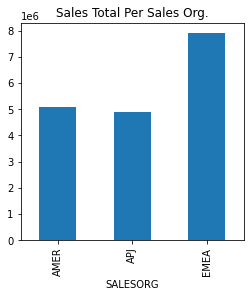

In [13]:
plt.figure(figsize=(4, 4)) # you can remove this line chart will be bigger 
plt.title('Sales Total Per Sales Org.')
sorg_total_sales.plot(kind='bar')

# Pie Chart

<AxesSubplot:ylabel='NETAMOUNT'>

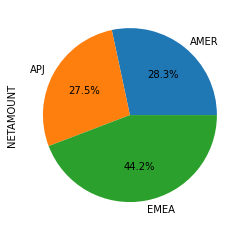

In [14]:
#sorg_total_sales.plot(kind='pie')
#sorg_total_sales.plot.pie()
sorg_total_sales.plot.pie(autopct='%1.1f%%')

44.2% of sales are coming from EMEA

**Sort data by TOP sales org | **TOP sales value****

In [15]:
sorg_total_sales = sorg_total_sales.reset_index()
sorg_total_sales.sort_values(by='NETAMOUNT', ascending=False)


,SALESORG,NETAMOUNT
2,EMEA,7902772.500
0,AMER,5068454.125
1,APJ,4908415.750


**Conclusion:** EMEA Sales Orgnization is the best sales org. (value + transactions)

# Sales Total Per Year (Best Year Sales).

In [16]:
year_total_sales = bikes_sales_data[['CREATEDAT','NETAMOUNT']].groupby('CREATEDAT').sum()


In [17]:
year_total_sales

,NETAMOUNT
CREATEDAT,
20180111,11888.625
20180112,11044.250
20180115,129010.875
20180116,153909.875
20180117,152238.625
...,...
20190618,9639.000
20190619,79293.375
20190622,99637.125


In [18]:
#Remove index
year_total_sales_no_index = bikes_sales_data[['CREATEDAT','NETAMOUNT']]

In [19]:
year_total_sales_no_index

,CREATEDAT,NETAMOUNT
0,20180111,11888.625
1,20180112,11044.250
2,20180115,39948.125
3,20180115,89062.750
4,20180116,62723.500
...,...,...
329,20190619,79293.375
330,20190622,99637.125
331,20190625,11106.375
332,20190627,61712.000


****SAP save date as integer :)  2018-01-11 = 20180111

In [20]:
#Check column data type
for col in year_total_sales_no_index:
    print (type(year_total_sales_no_index[col][1]))

<class 'numpy.int64'>
<class 'numpy.float64'>


**Convert CREATEDAT values from integer to string**

In [21]:
# Convert integer to Python string
year_total_sales_no_index['CREATEDAT'] = year_total_sales_no_index.CREATEDAT.astype('str')
#year_total_sales_no_index['NETAMOUNT'] = year_total_sales_no_index.CREATEDAT.astype('float')

<ipython-input-21-4d85fbd613df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_total_sales_no_index['CREATEDAT'] = year_total_sales_no_index.CREATEDAT.astype('str')


**check if the CREATEDAT data type converted to string type**

In [22]:
for col in year_total_sales_no_index:
    print (type(year_total_sales_no_index[col][1]))

<class 'str'>
<class 'numpy.float64'>


In [23]:
# Substring Year from Date
for index_label, row_series in year_total_sales_no_index.iterrows():
    string = row_series['CREATEDAT']   
    year_total_sales_no_index.at[index_label , 'CREATEDAT'] = string[0:4]
    

In [24]:
year_total_sales_no_index

,CREATEDAT,NETAMOUNT
0,2018,11888.625
1,2018,11044.250
2,2018,39948.125
3,2018,89062.750
4,2018,62723.500
...,...,...
329,2019,79293.375
330,2019,99637.125
331,2019,11106.375
332,2019,61712.000


In [25]:
year_total_sales_no_index = year_total_sales_no_index[['CREATEDAT','NETAMOUNT']].groupby('CREATEDAT').sum()
year_total_sales_no_index

,NETAMOUNT
CREATEDAT,
2018,1.184117e+07
2019,6.038468e+06


In [26]:
# suppress scientific notation in Pandas 1.184117e+07 to show as 11841174.625
year_total_sales_no_index.apply(lambda x: '%.5f' % x, axis=1)



CREATEDAT
2018    11841174.62500
2019     6038467.75000
dtype: object

<AxesSubplot:title={'center':'Sales Total Per Year'}, xlabel='CREATEDAT'>

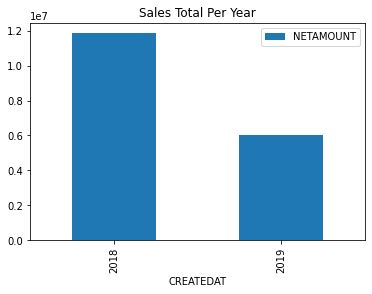

In [27]:
year_total_sales_no_index.plot(kind='bar', title="Sales Total Per Year")

array([<AxesSubplot:ylabel='NETAMOUNT'>], dtype=object)

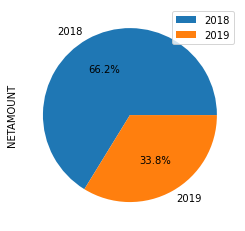

In [28]:
year_total_sales_no_index.plot.pie(autopct='%1.1f%%', subplots=True)

**Please consider upvoting if you found it useful to you :)**

**Thanks.**